In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

np.random.seed(123)
tf.random.set_seed(123)

## Data Exploration

In [ ]:
# https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones
# https://www.kaggle.com/erenaktas/human-activity-recognition
!wget -nc https://lazyprogrammer.me/course_files/timeseries/UCI-HAR.zip

File ‘UCI-HAR.zip’ already there; not retrieving.



In [ ]:
!unzip -nq UCI-HAR.zip

In [ ]:
!ls

 best_model_basic.h5	  best_model.h5   model.png    'UCI HAR Dataset'
 best_model_combined.h5   __MACOSX	  sample_data   UCI-HAR.zip


In [ ]:
!ls 'UCI HAR Dataset'

activity_labels.txt  features_info.txt	features.txt  README.txt  test	train


In [ ]:
!ls 'UCI HAR Dataset/train'

'Inertial Signals'   subject_train.txt	 X_train.txt   y_train.txt


In [ ]:
!head 'UCI HAR Dataset/train/subject_train.txt'

1
1
1
1
1
1
1
1
1
1


In [ ]:
!head 'UCI HAR Dataset/train/X_train.txt'

  2.8858451e-001 -2.0294171e-002 -1.3290514e-001 -9.9527860e-001 -9.8311061e-001 -9.1352645e-001 -9.9511208e-001 -9.8318457e-001 -9.2352702e-001 -9.3472378e-001 -5.6737807e-001 -7.4441253e-001  8.5294738e-001  6.8584458e-001  8.1426278e-001 -9.6552279e-001 -9.9994465e-001 -9.9986303e-001 -9.9461218e-001 -9.9423081e-001 -9.8761392e-001 -9.4321999e-001 -4.0774707e-001 -6.7933751e-001 -6.0212187e-001  9.2929351e-001 -8.5301114e-001  3.5990976e-001 -5.8526382e-002  2.5689154e-001 -2.2484763e-001  2.6410572e-001 -9.5245630e-002  2.7885143e-001 -4.6508457e-001  4.9193596e-001 -1.9088356e-001  3.7631389e-001  4.3512919e-001  6.6079033e-001  9.6339614e-001 -1.4083968e-001  1.1537494e-001 -9.8524969e-001 -9.8170843e-001 -8.7762497e-001 -9.8500137e-001 -9.8441622e-001 -8.9467735e-001  8.9205451e-001 -1.6126549e-001  1.2465977e-001  9.7743631e-001 -1.2321341e-001  5.6482734e-002 -3.7542596e-001  8.9946864e-001 -9.7090521e-001 -9.7551037e-001 -9.8432539e-001 -9.8884915e-001 -9.1774264e-001 -1.0000

In [ ]:
!head 'UCI HAR Dataset/train/y_train.txt'

5
5
5
5
5
5
5
5
5
5


In [ ]:
!ls 'UCI HAR Dataset/train/Inertial Signals'

body_acc_x_train.txt  body_gyro_x_train.txt  total_acc_x_train.txt
body_acc_y_train.txt  body_gyro_y_train.txt  total_acc_y_train.txt
body_acc_z_train.txt  body_gyro_z_train.txt  total_acc_z_train.txt


In [ ]:
!ls 'UCI HAR Dataset/test/Inertial Signals'

body_acc_x_test.txt  body_gyro_x_test.txt  total_acc_x_test.txt
body_acc_y_test.txt  body_gyro_y_test.txt  total_acc_y_test.txt
body_acc_z_test.txt  body_gyro_z_test.txt  total_acc_z_test.txt


In [ ]:
!head 'UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt'

  1.8085150e-004  1.0138560e-002  9.2755740e-003  5.0658970e-003  1.0810250e-002  4.0451010e-003  4.7573750e-003  6.2136470e-003  3.3067440e-003  7.5719410e-003  5.4071170e-003  6.2212760e-003  6.8950280e-003  4.6102600e-003  7.3313330e-003  5.0776670e-003  5.7625560e-003  6.6927480e-003  5.4432380e-003  8.2409520e-003  6.5064510e-003  6.5315230e-003  7.4224410e-003  5.7717690e-003  6.2401870e-003  4.6229820e-003  4.8329620e-003  5.4987460e-003  4.3411860e-003  5.0980180e-003  4.2687420e-003  3.0451870e-003  3.2041920e-003  4.5204000e-003  5.1272110e-003  3.5497910e-003  4.2342330e-003  4.4686700e-003  3.5727020e-003  5.1362780e-003  5.3797860e-003  4.4085200e-003  2.2440390e-003 -1.1835980e-003 -6.7953420e-004  2.2813890e-003  3.6537280e-003  2.3126390e-003 -4.0421940e-005  5.3422540e-004  2.9632630e-003  4.3994680e-003  2.7023390e-003  3.4523100e-004  2.9169110e-003  4.9785560e-003  3.4468700e-003  4.3781510e-003  5.0061700e-003  1.9967950e-003 -4.7185960e-004 -7.5556790e-004 -1.5281

In [ ]:
df = pd.read_csv(
    'UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt',
    header=None,
    delim_whitespace=True,
)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,0.005407,0.006221,0.006895,0.004610,0.007331,0.005078,0.005763,0.006693,0.005443,0.008241,0.006506,0.006532,0.007422,0.005772,0.006240,0.004623,0.004833,0.005499,0.004341,0.005098,0.004269,0.003045,0.003204,0.004520,0.005127,0.003550,0.004234,0.004469,0.003573,0.005136,...,0.000389,0.001328,0.002053,0.002738,0.002743,0.001330,-0.000367,-0.000722,-0.001904,-0.004294,-0.000025,0.005251,0.002490,0.000811,0.001166,-0.000693,-0.000077,0.000504,-0.000495,0.000156,0.000065,-0.000320,0.000185,-0.000375,-0.001013,-0.001611,-0.001765,-0.000636,0.001047,0.003019,0.001412,-0.001509,0.000060,0.000435,-0.000819,0.000228,-0.000300,-0.001147,-0.000222,0.001576
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,-0.000487,-0.000356,-0.000229,-0.000131,-0.000441,-0.001565,-0.000929,0.000009,-0.001236,-0.000911,-0.000435,-0.001177,0.000165,0.000751,0.000389,0.001328,0.002053,0.002738,0.002743,0.001330,-0.000367,-0.000722,-0.001904,-0.004294,-0.000025,0.005251,0.002490,0.000811,0.001166,-0.000693,...,-0.001506,-0.002105,-0.001494,0.002181,0.002876,0.000871,-0.000392,-0.000569,0.000569,-0.001176,-0.001957,-0.000471,0.000208,0.003380,0.004829,0.003380,0.001088,-0.001249,0.000387,0.000533,-0.000679,0.000594,-0.000084,-0.000142,0.000784,0.001507,0.003386,0.002166,0.000422,0.000854,-0.000104,-0.000141,0.001333,0.001541,0.001077,-0.000736,-0.003767,-0.004646,-0.002941,-0.001599
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,-0.006476,-0.003423,-0.000610,-0.002929,-0.001796,0.000956,0.002311,0.002538,0.001180,0.001217,0.000869,0.000686,0.002156,0.000478,-0.001506,-0.002105,-0.001494,0.002181,0.002876,0.000871,-0.000392,-0.000569,0.000569,-0.001176,-0.001957,-0.000471,0.000208,0.003380,0.004829,0.003380,...,0.002138,0.003519,0.002715,0.002370,0.003299,0.002357,0.001481,-0.000340,-0.002201,0.000124,0.002345,0.002706,0.001281,-0.000949,0.000890,0.004952,0.007315,0.004242,-0.002776,-0.004625,-0.001945,0.002561,0.007382,0.005730,0.002901,0.002896,0.000533,0.000552,0.001286,-0.000926,0.000661,0.001853,-0.000268,-0.000394,-0.000279,-0.000316,0.000144,0.001246,0.003117,0.002178
3,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,-0.008882,-0.010483,-0.004482,0.004528,0.008167,0.002929,-0.004487,-0.004717,-0.001637,-0.000097,0.001614,0.002619,0.004765,0.005851,0.002579,0.000677,0.002138,0.003519,0.002715,0.002370,0.003299,0.002357,0.001481,-0.000340,-0.002201,0.000124,0.002345,0.002706,0.001281,-0.000949,0.000890,0.004952,...,0.001470,0.001644,-0.000106,-0.001683,-0.001165,0.000241,0.000216,-0.000102,-0.001546,-0.003518,-0.003204,-0.002376,-0.001825,-0.001754,-0.002504,-0.002612,-0.002715,-0.001748,0.000066,-0.000050,-0.000898,-0.001478,-0.000698,0.000441,-0.001206,-0.002607,-0.001986,-0.001230,-0.001129,-0.001334,0.000458,0.002103,0.001358,0.000820,-0.000212,-0.001915,-0.001631,-0.000867,-0.001172,-0.000028
4,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,0.002247,0.002175,0.001750,0.001420,0.000297,0.000665,0.001911,0.001778,0.001087,-0.000716,-0.001347,-0.000384,-0.000135,0.000666,0.000656,0.000221,0.001470,0.001644,-0.000106,-0.001683,-0.001165,0.000241,0.000216,-0.000102,-0.001546,-0.003518,-0.003204,-0.002376,-0.001825,-0.001754,-0.002504,-0.002612,...,-0.001015,0.001832,0.001169,0.000362,-0.002587,-0.002581,0.001470,0.003026,0.003734,0.001870,-0.000212,0.000945,0.001956,0.002602,0.001366,0.000665,-0.000459,-0.004151,-0.003591,-0.001328,-0.000153,0.001043,0.000407,-0.000614,-0.002858,-0.003824,-0.001411,0.000765,0.001153,0.000627,0.002529,0.003518,-0.000248,-0.002761,

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 128 entries, 0 to 127
dtypes: float64(128)
memory usage: 7.2 MB


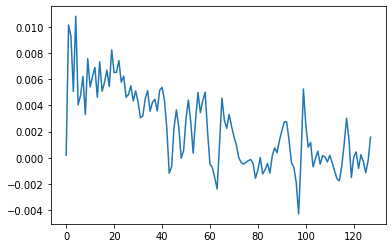

In [ ]:
df.iloc[0].plot();

In [ ]:
# Obtain these by inspecting the files
T = 128
Ntrain = 7352
Ntest = 2947
D = 9 # since there are 9 files
K = 6 # number of classes (1-6)

In [ ]:
def load_data():
  # Returns:
  # Xtrain (Ntrain x T x D), Ytrain (Ntrain)
  # Xtest (Ntest x T x D), Ytest (Ntest)

  Xtrain = np.zeros((Ntrain, T, D))
  Xtest = np.zeros((Ntest, T, D))

  # train data
  ts_filenames = [
    'body_acc_x_train.txt', 'body_gyro_x_train.txt', 'total_acc_x_train.txt',
    'body_acc_y_train.txt', 'body_gyro_y_train.txt', 'total_acc_y_train.txt',
    'body_acc_z_train.txt', 'body_gyro_z_train.txt', 'total_acc_z_train.txt',
  ]

  ts_file_prefix = 'UCI HAR Dataset/train/'

  for d, fn in enumerate(ts_filenames):
    df = pd.read_csv(
        f'{ts_file_prefix}Inertial Signals/{fn}',
        header=None,
        delim_whitespace=True)

    # Ntrain x T array
    x = df.to_numpy()
    Xtrain[:, :, d] = x
  
  # train labels
  Ytrain = pd.read_csv(
      f'{ts_file_prefix}y_train.txt', header=None).to_numpy() - 1
  Ytrain = Ytrain.flatten()

  # test data
  ts_filenames = [
    'body_acc_x_test.txt', 'body_gyro_x_test.txt', 'total_acc_x_test.txt',
    'body_acc_y_test.txt', 'body_gyro_y_test.txt', 'total_acc_y_test.txt',
    'body_acc_z_test.txt', 'body_gyro_z_test.txt', 'total_acc_z_test.txt',
  ]

  ts_file_prefix = 'UCI HAR Dataset/test/'

  for d, fn in enumerate(ts_filenames):
    df = pd.read_csv(
        f'{ts_file_prefix}Inertial Signals/{fn}',
        header=None,
        delim_whitespace=True)

    # Ntrain x T array
    x = df.to_numpy()
    Xtest[:, :, d] = x
  
  # test labels
  Ytest = pd.read_csv(
      f'{ts_file_prefix}y_test.txt', header=None).to_numpy() - 1
  Ytest = Ytest.flatten()

  return Xtrain, Ytrain, Xtest, Ytest

In [ ]:
Xtrain, Ytrain, Xtest, Ytest = load_data()

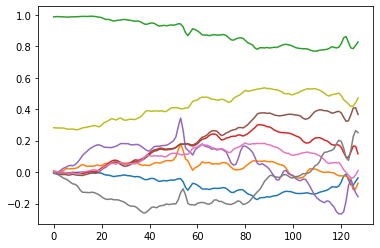

In [ ]:
# plot all D=9 time series of length T=128
plt.plot(Xtrain[7000, :, :]);

In [ ]:
# ANN
inputs = []
features = []

# make a neural network for each of the D time series
for d in range(D):
  i = Input(shape=(T,))
  x = Dense(32, activation='relu')(i)
  x = Dense(16, activation='relu')(x)
  inputs.append(i)
  features.append(x)

# output of concatenate will be D * (size of individual ANN output)
x = Concatenate()(features)
x = Dense(K)(x)
model = Model(inputs, x)

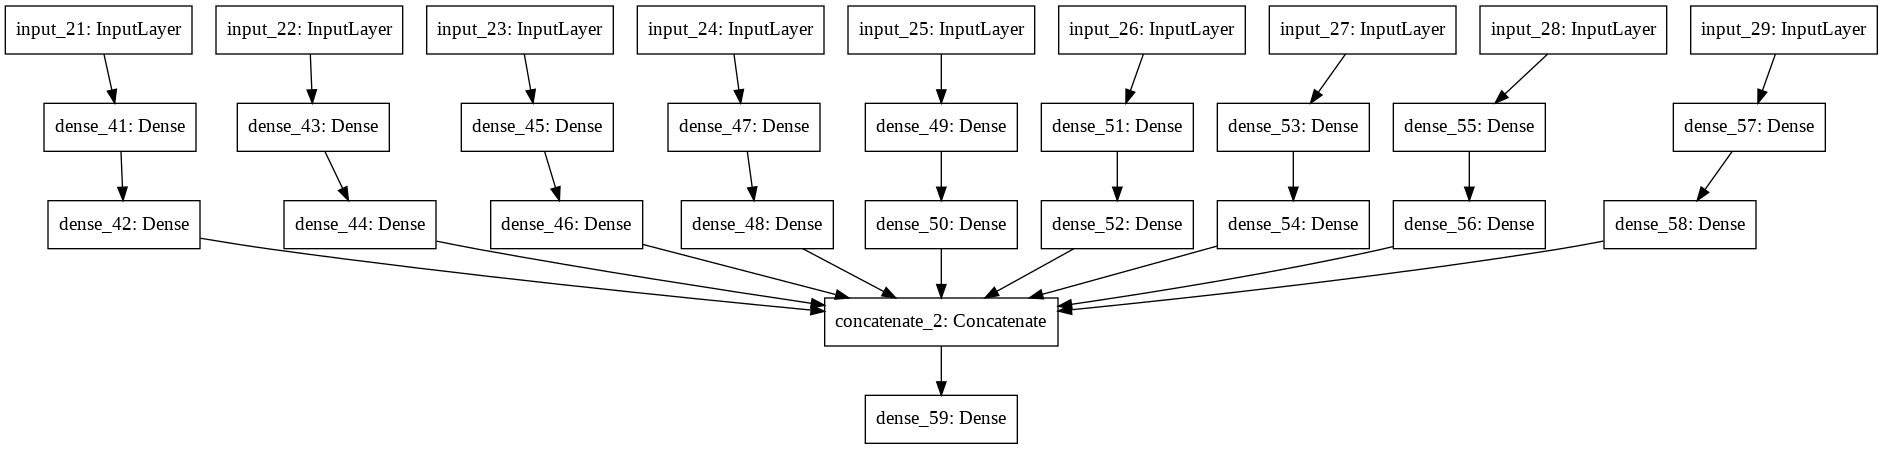

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
check_point = ModelCheckpoint(
    'best_model.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
model.compile(
  loss=SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy'],
)

In [ ]:
Xtrain_split = []
Xtest_split = []
for d in range(D):
  Xtrain_split.append(Xtrain[:, :, d])
  Xtest_split.append(Xtest[:, :, d])

In [ ]:
r = model.fit(
  Xtrain_split,
  Ytrain,
  epochs=15,
  callbacks=[check_point],
  validation_data=(Xtest_split, Ytest),
)

Epoch 1/15
230/230 [==============================] - 2s 6ms/step - loss: 0.6419 - accuracy: 0.7765 - val_loss: 0.4370 - val_accuracy: 0.8351
Epoch 2/15
230/230 [==============================] - 1s 5ms/step - loss: 0.2295 - accuracy: 0.9206 - val_loss: 0.3379 - val_accuracy: 0.8761
Epoch 3/15
230/230 [==============================] - 1s 5ms/step - loss: 0.1647 - accuracy: 0.9421 - val_loss: 0.3020 - val_accuracy: 0.8856
Epoch 4/15
230/230 [==============================] - 1s 5ms/step - loss: 0.1388 - accuracy: 0.9464 - val_loss: 0.2924 - val_accuracy: 0.9046
Epoch 5/15
230/230 [==============================] - 1s 5ms/step - loss: 0.1226 - accuracy: 0.9554 - val_loss: 0.2560 - val_accuracy: 0.9060
Epoch 6/15
230/230 [==============================] - 1s 5ms/step - loss: 0.1102 - accuracy: 0.9612 - val_loss: 0.2664 - val_accuracy: 0.9033
Epoch 7/15
230/230 [==============================] - 1s 5ms/step - loss: 0.1023 - accuracy: 0.9641 - val_loss: 0.2694 - val_accuracy: 0.9131
Epoch 

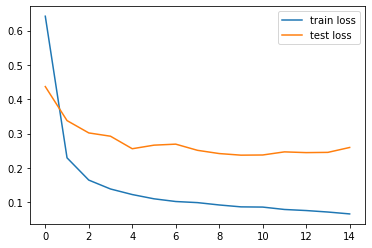

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

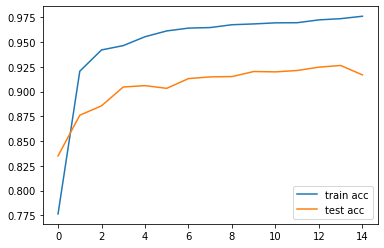

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend();

In [ ]:
# load best model
best_model = tf.keras.models.load_model('best_model.h5')

In [ ]:
# make predictions
Ptest = best_model.predict(Xtest_split)

In [ ]:
# evaluate
np.mean(np.argmax(Ptest, axis=1) == Ytest)

0.9263657957244655

In [ ]:
from sklearn.preprocessing import StandardScaler

def load_features():
  # Returns:
  # X_train (Ntrain x D)
  # X_test (Ntest x D)

  # train data
  df = pd.read_csv(
        'UCI HAR Dataset/train/X_train.txt',
        header=None,
        delim_whitespace=True)
  
  feat_train = df.to_numpy()

  # test data
  df = pd.read_csv(
        'UCI HAR Dataset/test/X_test.txt',
        header=None,
        delim_whitespace=True)
  
  feat_test = df.to_numpy()

  scaler = StandardScaler()
  feat_train = scaler.fit_transform(feat_train)
  feat_test = scaler.transform(feat_test)

  return feat_train, feat_test

In [ ]:
feat_train, feat_test = load_features()

In [ ]:
D_feat = feat_train.shape[1]

In [ ]:
# Basic ANN
i = Input(shape=(D_feat,))
x = Dense(32, activation='relu')(i)
x = Dense(K)(x)
model = Model(i, x)

In [ ]:
model.compile(
  loss=SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy'],
)

In [ ]:
check_point2 = ModelCheckpoint(
    'best_model_basic.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
r = model.fit(
  feat_train,
  Ytrain,
  epochs=15,
  callbacks=[check_point2],
  validation_data=(feat_test, Ytest),
)

Epoch 1/15
230/230 [==============================] - 1s 3ms/step - loss: 0.3325 - accuracy: 0.8762 - val_loss: 0.1941 - val_accuracy: 0.9298
Epoch 2/15
230/230 [==============================] - 1s 2ms/step - loss: 0.1084 - accuracy: 0.9631 - val_loss: 0.1534 - val_accuracy: 0.9386
Epoch 3/15
230/230 [==============================] - 1s 3ms/step - loss: 0.0766 - accuracy: 0.9732 - val_loss: 0.1479 - val_accuracy: 0.9396
Epoch 4/15
230/230 [==============================] - 1s 2ms/step - loss: 0.0604 - accuracy: 0.9784 - val_loss: 0.1586 - val_accuracy: 0.9420
Epoch 5/15
230/230 [==============================] - 1s 3ms/step - loss: 0.0521 - accuracy: 0.9834 - val_loss: 0.1548 - val_accuracy: 0.9437
Epoch 6/15
230/230 [==============================] - 1s 2ms/step - loss: 0.0405 - accuracy: 0.9872 - val_loss: 0.1470 - val_accuracy: 0.9488
Epoch 7/15
230/230 [==============================] - 1s 2ms/step - loss: 0.0378 - accuracy: 0.9872 - val_loss: 0.1814 - val_accuracy: 0.9420
Epoch 

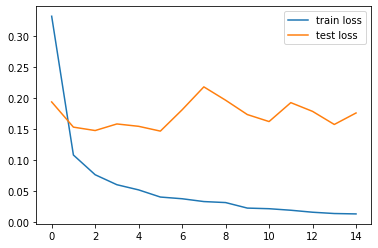

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

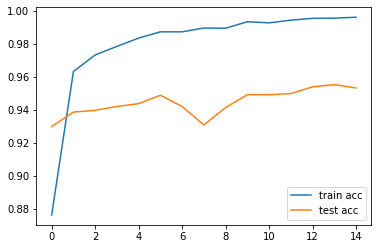

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend();

In [ ]:
# load best model
best_model = tf.keras.models.load_model('best_model_basic.h5')

In [ ]:
# make predictions
Ptest = best_model.predict(feat_test)

In [ ]:
# evaluate
np.mean(np.argmax(Ptest, axis=1) == Ytest)

0.9552086868001357

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = LogisticRegression(
    solver='liblinear',
)
model.fit(feat_train, Ytrain)
model.score(feat_train, Ytrain)

0.9945593035908596

In [ ]:
model.score(feat_test, Ytest)

0.9613165931455717

In [ ]:
model = SVC()
model.fit(feat_train, Ytrain)
model.score(feat_train, Ytrain)

0.9866702937976061

In [ ]:
model.score(feat_test, Ytest)

0.9521547336274178

In [ ]:
# model = SVC(kernel='linear')
model = LinearSVC()
model.fit(feat_train, Ytrain)
model.score(feat_train, Ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9978237214363439

In [ ]:
model.score(feat_test, Ytest)

0.9640312181879878

In [ ]:
model = RandomForestClassifier()
model.fit(feat_train, Ytrain)
model.score(feat_train, Ytrain)

1.0

In [ ]:
model.score(feat_test, Ytest)

0.9307770614183916

In [ ]:
# Combined Model
inputs = []
features = []

# make a neural network for each of the D time series
for d in range(D):
  i = Input(shape=(T,))
  x = Dense(32, activation='relu')(i)
  x = Dense(16, activation='relu')(x)
  inputs.append(i)
  features.append(x)

i2 = Input(shape=(D_feat,))
x2 = Dense(32, activation='relu')(i2)

# output of concatenate will be D * (size of individual ANN output)
x = Concatenate()(features + [x2])
x = Dense(K)(x)
model = Model(inputs + [i2], x)

In [ ]:
model.compile(
  loss=SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy'],
)

In [ ]:
check_point3 = ModelCheckpoint(
    'best_model_combined.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
r = model.fit(
  Xtrain_split + [feat_train],
  Ytrain,
  epochs=15,
  callbacks=[check_point3],
  validation_data=(Xtest_split + [feat_test], Ytest),
)

Epoch 1/15
230/230 [==============================] - 2s 6ms/step - loss: 0.2888 - accuracy: 0.9026 - val_loss: 0.2285 - val_accuracy: 0.9165
Epoch 2/15
230/230 [==============================] - 1s 5ms/step - loss: 0.0923 - accuracy: 0.9698 - val_loss: 0.1768 - val_accuracy: 0.9406
Epoch 3/15
230/230 [==============================] - 1s 5ms/step - loss: 0.0674 - accuracy: 0.9750 - val_loss: 0.1775 - val_accuracy: 0.9342
Epoch 4/15
230/230 [==============================] - 1s 5ms/step - loss: 0.0550 - accuracy: 0.9799 - val_loss: 0.1857 - val_accuracy: 0.9386
Epoch 5/15
230/230 [==============================] - 1s 5ms/step - loss: 0.0488 - accuracy: 0.9805 - val_loss: 0.1485 - val_accuracy: 0.9518
Epoch 6/15
230/230 [==============================] - 1s 5ms/step - loss: 0.0388 - accuracy: 0.9865 - val_loss: 0.1597 - val_accuracy: 0.9488
Epoch 7/15
230/230 [==============================] - 1s 5ms/step - loss: 0.0351 - accuracy: 0.9882 - val_loss: 0.1784 - val_accuracy: 0.9471
Epoch 

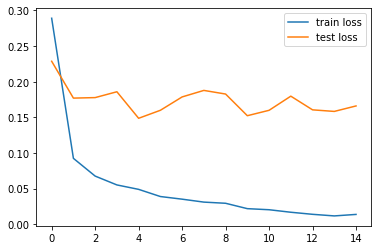

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

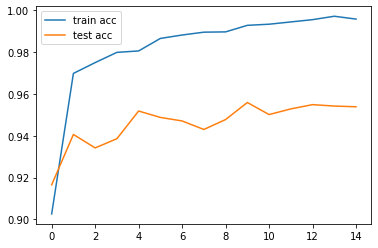

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend();

In [ ]:
# load best model
best_model = tf.keras.models.load_model('best_model_combined.h5')

In [ ]:
# make predictions
Ptest = best_model.predict(Xtest_split + [feat_test])

In [ ]:
# evaluate
np.mean(np.argmax(Ptest, axis=1) == Ytest)

0.9558873430607397